<a href="https://colab.research.google.com/github/nivedphil/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
c_data = pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")

In [4]:
c_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
necessary_data = c_data.iloc[:,[3,4]].values

In [7]:
print(necessary_data[:6])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]]


In [9]:
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters = i, init='k-means++', random_state=35)
  km.fit(necessary_data)

  wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

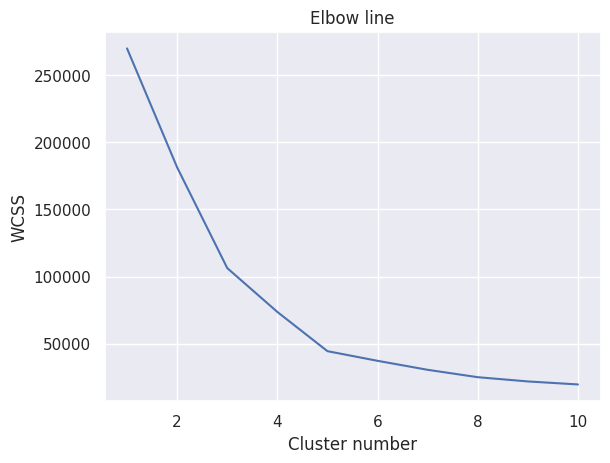

In [11]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('Elbow line')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

In [12]:
km_final = KMeans(n_clusters = 5, init = 'k-means++', random_state=23)
cluster_no = km_final.fit_predict(necessary_data)
print(cluster_no)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 1 0 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


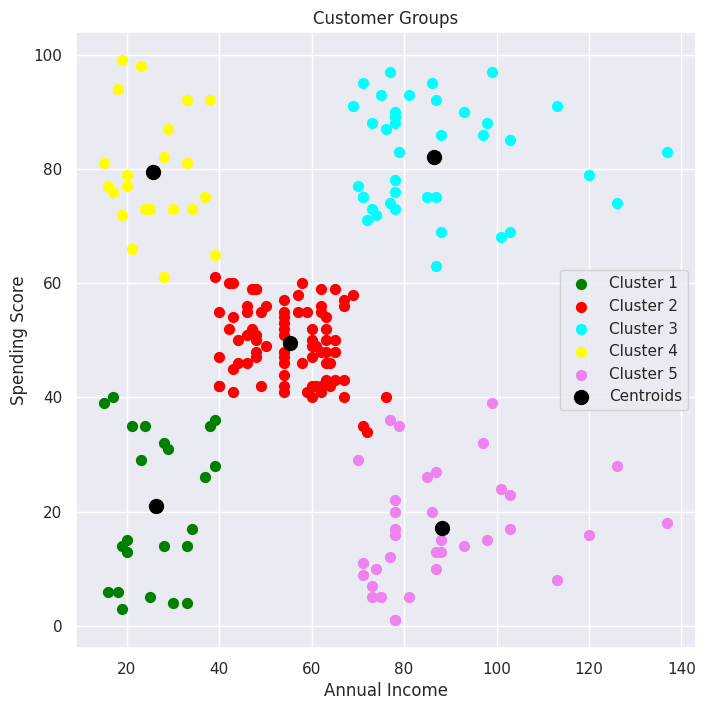

In [13]:
plt.figure(figsize = (8,8))
plt.scatter(necessary_data[cluster_no == 0, 0], necessary_data[cluster_no == 0, 1], s = 50, c = 'green', label='Cluster 1')
plt.scatter(necessary_data[cluster_no == 1, 0], necessary_data[cluster_no == 1, 1], s = 50, c = 'red', label='Cluster 2')
plt.scatter(necessary_data[cluster_no == 2, 0], necessary_data[cluster_no == 2, 1], s = 50, c = 'cyan', label='Cluster 3')
plt.scatter(necessary_data[cluster_no == 3, 0], necessary_data[cluster_no == 3, 1], s = 50, c = 'yellow', label='Cluster 4')
plt.scatter(necessary_data[cluster_no == 4, 0], necessary_data[cluster_no == 4, 1], s = 50, c = 'violet', label='Cluster 5')

plt.scatter(km_final.cluster_centers_[:,0], km_final.cluster_centers_[:,1], s = 100, c = 'black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()